# Homework 6 Problem 2

#### 1. How to divide the 24 galaxies into groups

In Hubble's orginal paper "A Relation between Distance and Radial Velocity among Extra-Galactic Nebulae" 1929, table 1 lists 24 nebulae that are used to plot his famous diagram. 

Looking at table 1, one realizes that a few nebulae have almost the same distance r, maybe it will be easier to simply group them together as a single data point. This would make sense if the nebulae actually belong to the same cluster of galaxies. I should mention that Hubble called the galaxies, nebulae, since people weren't sure exactly what they were. Nowadays we know they're galaxies, so from this point on, we will just call them galaxies. 

So let's group the galaxies broadly based on distance r fist. Then we check the positions of these galaxies in the sky. If they are not in roughly the same position in the sky, we can not group them together, since they must be separate galaxies but just happen to have similar distances to Earth. The positions of the galaxies can be found on this website: http://spider.seds.org/ngc/ngc.html. 

The positions of the galaxies are given by angular measurements in the sky. The right ascension tells the longitudinal position: how far to the East or West in the sky. The Declination tells how high up in the sky is the object located.

![Angular position in the sky](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Ra_and_dec_on_celestial_sphere.png/600px-Ra_and_dec_on_celestial_sphere.png)

(Image from wikipedia, https://en.wikipedia.org/wiki/Right_ascension. Attribution: Tfr000 (talk) 15:34, 15 June 2012 (UTC), CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons)

Looking at table 1, all the galaxies have a catalogue number that we can put into http://spider.seds.org/ngc/ngc.html and find out their positions, except the first two. S.Mag. and L.Mag., what are they? I'm totally guessing here, they're probably the same group, given their similar name and similar distances. S.Mag. might have to do with Andromeda Galaxy, based on google search.

Here is my grouping. The group index is the last column of the table:


![Grouping Hubble's data](https://github.com/piaohanx/CP1_Hubble/blob/main/grouping.png?raw=true)

 ---
 As could be seen, I divided the data into 13 groups. Some groups could be merged together, but not being an astronomer, I don't know how big a variation in the angular position is accpetable for grouping the data points together into a single cluster... So I guess I will just go with my 13 groups rather than Hubble's 9 groups. 



#### 2. Fitting the data

In the previous section, we divided the data points into 13 groups, based on their distances and angular positions. I calculated average distance and velocity in each group. Thus we have the following 13 data points:

![Group averages](https://github.com/piaohanx/CP1_Hubble/blob/main/Group%20averages.png?raw=true)

---

The following is my attempt to try to read in the data from the CSV file I generated named "Hubble2.csv", and then fit it. I used the code from the Jupyter notebook quake.ipynb to import the data. The code are as follows:

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from least_squares import least_squares

In [26]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [28]:
# Import the distance data from Hubble's original paper
r = np.genfromtxt(fname='Hubble2.csv', usecols=(0),skip_header=1, delimiter=',')

In [29]:
# Let us check if we indeed imported the distances correctly
r

array([0.033, 0.214, 0.263, 0.275, 0.576, 0.9  , 0.9  , 0.9  , 1.   ,
       1.1  , 1.1  , 1.55 , 2.   ])

In [30]:
# Import the velocity data from Hubble's original paper
v = np.genfromtxt(fname='Hubble2.csv', usecols=(1),skip_header=1, delimiter=',')

In [31]:
# Let us check if we indeed imported the velocity correctly
v

array([230. , 130. ,  70. , 202.5, 252. ,  30. , 400. , 500. , 920. ,
       450. , 500. , 730. , 810. ])

---
Now that we have correctly imported the data, we can fit the data. The python code least_square.py however is not my own :( I used the one already inside the data analysis folder. I think I understand the idea how the code works. Essentially, we had to minimized the least square function, and so we need to do differentiation and equate the differentials to zero. This results in a set of simultaneous equations, which we can solve to find the gradient and the intercept of our linear fit line. All these steps are done on paper, the code does not differentiate or solve the system of equations! The python code just calculates the results of our solutions. In Problem 1, I have done on paper the minimization of the chi square function. I arrived at the stage where we have a system of equations, but the solutions to the system of equations are incredibly hard to find. It involves a lot of algebra. If I could find those solutions I could then put them in a python code and let it calculate for me.

 Least squares fit of 13 data points
 -----------------------------------
 Hubble's constant slope   b = 386.59 +-  99.55  km/s/Mpc
 Intercept with r axis     a =  80.39 +-  98.69  km/s
 Estimated v error bar sigma = 193.7 km/s


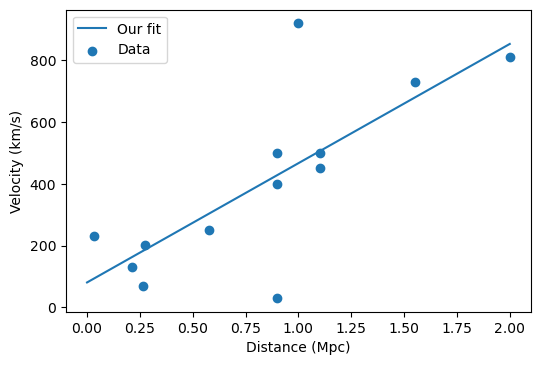

In [33]:
# Here I uses the the least_square.py code from the data analysis folder. 
# It is the not the code I have written myself though :(

[a, b, sigma, sigma_a, sigma_b] = least_squares(r,v)

n = len(r)   # number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()

# If we want to check our fitting result against numpy's fitting result, we can add the following line. 
# p,cov = np.polyfit( r, v, 1, cov=True)

# Print out results
print (' Least squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')

# Again, If we want to check our fitting result against numpy's fitting result, we can add these line.
# print (" numpy's values:           b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[0], np.sqrt(cov[0,0])))
# print ("                           a = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[1], np.sqrt(cov[1,1])))


rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals
fnp = p[1] + p[0] * rvals
plt.figure(1)
plt.scatter( r, v, label = "Data" )
plt.plot( rvals, f , label="Our fit")

# If we want to compare to numpy fitting result we can add the following line.
# plt.plot( rvals, fnp, label = "numpy fit")

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()

--- 
The results are quite a bit different... But we used different groups of data from those used by Hubble I suppose. The slope of the straight line is called Hubble constant $H_0$, and the age of the universe is related to $\frac{1}{H_0}$ (or $\frac{2}{3{H_0}}$, depending on the cosmological model we use). 

If we use the slope, $b=386.59km/s/Mpc$ (the error margin is pretty big. But we only have 13 data points. We may expect that if we had more data points, the result might be more accurate), then 

$\frac{1}{H_0} = 2.59$ billion years

This is much shorter than our current estimate of $14$ billion years. Also it's worse than Hubble's estimate which is between 7 to 20 billion years. So, we probably didn't do a good job :P 